In [1]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [2]:
import numpy as np
import sys
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c
from my_code import pytorch_model as ptm

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
# name of the notebook
name_notebook = "sweep_12c_h"

In [4]:
sweep = c.Sweep(
    name_notebook, 
    description="Sweep of optimizers and learning rates for 12c_h (3 layers)",
    optimizer=[ptm.optim.Adam, ptm.optim.SGD],
    lr=[1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5],
)

In [5]:
sweep.save(
        file_name='sweep_12c_h', #TODO: automatic-> version
        initial_path=initial_path
    )

In [6]:
for sweep_point in sweep:
    # Define the model
    class Model(ptm.Model):
        def __init__(self):
            super(Model, self).__init__()
            self.fc1 = ptm.nn.Linear(228, 228//2)
            self.fc2 = ptm.nn.Linear(228//2, 12)
            self.fc3 = ptm.nn.Linear(12, 1)

        def forward(self, x):
            x = ptm.torch.sigmoid(self.fc1(x))
            x = ptm.torch.sigmoid(self.fc2(x))
            x = self.fc3(x)
            return x

    model = Model()

    # set the name and path of the model
    model.set_name_and_path(name_notebook, initial_path)

    # train the model 
    model.optimize_params(
        #save info
        save_model_info = True,
        description = 'sweep test with 12 amino acids and clasical QML',    
        #data
        data=c.Data.load(initial_path=initial_path, file_name='PET_SCORES_12'),
        # train options
        optimizer = sweep_point['optimizer'],
        optimizer_options = {'lr': sweep_point['lr']},
        num_epochs = 30,                
        batch_size = 32,
        # early stopping options
        stop_training_options = {
            'lookback_epochs': 5, 
            'threshold_slope': 0.001,
            'threshold_std_dev': 0.2
        },
        # metadata
        metadata = {
            'seep_uuid': str(sweep.uuid),
            'sweep_point': {k:str(v) for k,v in sweep_point.items()},
        }
    )

    # -- ADD INFO TO SWEEP -- #
    sweep.add_info(
        idx=sweep_point['idx'],
        best_loss_train=model.results.loss_epoch.best,
        best_loss_test=model.results.loss_validation_epoch.best,
        loss_validation=model.results.mean_loss_validation,
        time_train=model.results.time_epoch.last,
    )
    sweep.save(
        file_name='sweep_12c_h', #TODO: automatic-> version
        initial_path=initial_path
    )

    # -- VALIDATION and PLOTS -- #
    model.plot_losses(fig_size=(6,6))
    model.validate(
        pct=1,
        add_to_results=True,
        plot=True,
        print_items=False
    )

    # -- SAVE -- #
    model.save_results()

Epoch [0/6], Loss epoch: 0.0391, Loss validation: 0.0393


KeyboardInterrupt: 

Folder '../checkpoints/Models/0911/' created successfully.
Epoch [0/2], Loss epoch: 0.2606, Loss validation: 0.2602
	 Validation string, 	 i: 2442; 	 prediction: -0.2819, 	 target: -0.2724, 	 loss: 0.0001
	 Validation string, 	 i: 4190; 	 prediction: -0.2819, 	 target: -0.4062, 	 loss: 0.0155
	 Validation string, 	 i: 305; 	 prediction: -0.2819, 	 target: -0.0689, 	 loss: 0.0454
Epoch [1/2], Loss epoch: 0.0210, Loss validation: 0.0207, Time remaining: ~0.0h 0.0m 25s
	 Validation string, 	 i: 2731; 	 prediction: -0.2804, 	 target: -0.3449, 	 loss: 0.0042
	 Validation string, 	 i: 4408; 	 prediction: -0.2804, 	 target: -0.1233, 	 loss: 0.0247
	 Validation string, 	 i: 1861; 	 prediction: -0.2804, 	 target: -0.4877, 	 loss: 0.0430
Epoch [2/2], Loss epoch: 0.0208, Loss validation: 0.0207, Time remaining: ~0.0h 0.0m 0s


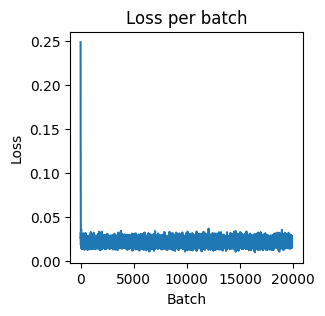

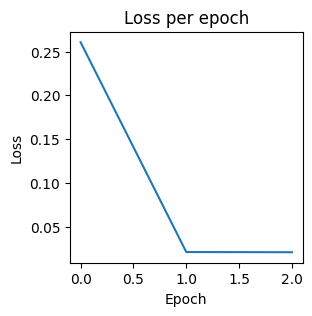

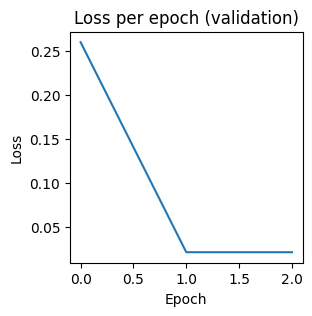

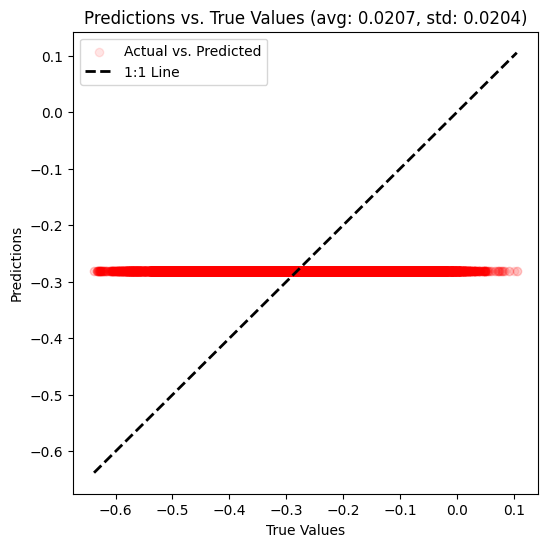

Mean loss: 0.020679723541022973, std loss: 0.020433114002026784


Folder '../checkpoints/Results/0911/' created successfully.


In [ ]:
model.results.parameters_epoch

{'last': None, 'best': None}